In [16]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

N = 10  # Fock空间维度
b1 = tensor(destroy(N), qeye(N))  
b2 = tensor(qeye(N), destroy(N))  
omega = 1.0
g_0 = 0.1

# 定义系统的哈密顿量 H 和观测量 Q1 和 Q2
H0 = omega * (b1.dag() * b1 + b2.dag() * b2 + 1)
H1 = g_0/(omega**2) * ((b1.dag() + b1)**2) * ((b2.dag() + b2)**2)
H = H0 + H1  # 哈密顿量
Q1 = b1.dag() * b1 * b2 * b2 
# Q2 = b1 * b1.dag() * b2.dag() * b2.dag() # 观测量

psi0 = tensor(basis(N, 1), basis(N, 0))  # 两个谐振子的基态

# 定义时间范围和时间间隔
t_list = np.linspace(0, 1000, 1000) # 时间范围
tau = 0.01  # 时间间隔

expectation_values = []
possibility = []

for t in t_list:
    times = [t,t+tau]
    result = sesolve(H, psi0, times, [])
    Psi_t_plus_tau = result.states[1]
    Psi_t = result.states[0]
    expectation_value = Psi_t.dag() * Q1 * Psi_t_plus_tau
    possibility.append(np.vdot(expectation_value,expectation_value))


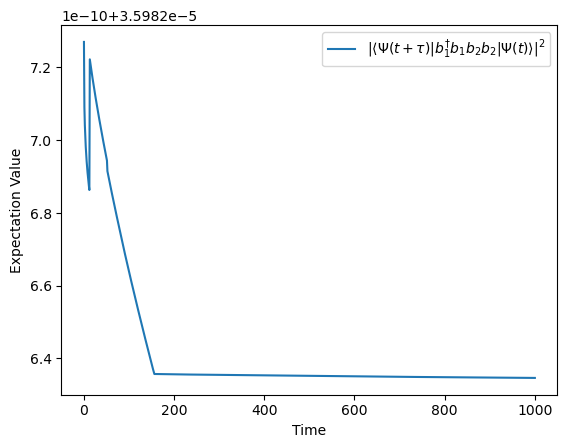

In [17]:

# 绘制结果
plt.figure()
plt.plot(t_list, possibility , label=r'$|\langle Ψ(t+\tau) | b_1^{\dagger}b_1b_2b_2 | Ψ(t) \rangle|^2$')
plt.xlabel('Time')
plt.ylabel('Expectation Value')
plt.legend()
plt.show()